## Ex. 1-2) Modify colors using HSV (hue, saturation, and value) color space
Sometimes it is easier to convert pixel valeus from RGB to HSV and modify them. Write a code that increaess saturation values of an input image to 1.2 times. See https://www.rapidtables.com/convert/color/index.html for converting equations.
<img src="fig/rgb2hsv.png" style="width:400px">

### Type your code below.

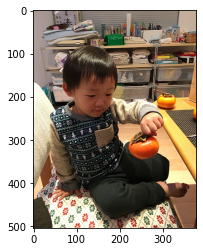

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from time import time
from matplotlib.colors import hsv_to_rgb, rgb_to_hsv

in_img_path = 'in/kid.png'
img = Image.open(in_img_path)
pix = np.asarray(img)
pix = pix/255
plt.imshow(pix)

## Define Functions using if-else statements

Main functions:
- RGB2HSV1
- HSV2RGB1

In [2]:
# RBG2HSV1
# Convert pixel RGB to HSV using if-else statements
#
# Parameters:
# rgb = (r, g, b) = (0..1, 0..1, 0..1)
# Cmax  float32
# delta float32
#
# Return:
# (h, s, v) = (0..1, 0..1, 0..1)
def RGB2HSV1(rgb, Cmax, delta):
    r, g, b = rgb
    if delta == 0:
        h = 0
    elif Cmax == r:
        h = (((g - b) / delta) % 6) / 6
    elif Cmax == g:
        h = ((b - r) / delta + 2) / 6
    elif Cmax == b:
        h = ((r - g) / delta + 4) / 6
    s = 0.
    if Cmax > 0:
        s = delta / Cmax
    v = Cmax
    return np.float32([h, s, v])

# HSV2RGB1
# Convert pixel HSV to RGB using if-elst statements
#
# Parameters:
# hsv = (h, s, v) = (0..1, 0..1, 0..1)
# c  float32
# x  float32
# m  float32
#
# Returns:
# (r, g, b) (0..1, 0..1, 0..1)
def HSV2RGB1(h, c, x, m):
    if 0 <= h and h < 1/6:
        r = c
        g = x
        b = 0
    elif 1/6 <= h and h < 1/3:
        r = x
        g = c
        b = 0
    elif 1/3 <= h and h < 0.5:
        r = 0
        g = c
        b = x
    elif 0.5 <= h and h < 2/3:
        r = 0
        g = x
        b = c
    elif 2/3 <= h and h < 5/6:
        r = x
        g = 0
        b = c
    elif 5/6 <= h and h < 1:
        r = c
        g = 0
        b = x
    else:
        raise ValueError('Invalid Hue value')
    return np.float32([r, g, b])+m

## Define Functions using Dictionary

Main functions:
- RGB2HSV1
- HSV2RGB1

In [3]:
# In Python, dictionary can hash functions! We will use that.

def rgb_to_h0(rgb, delta):
    if delta < 1e-5:
        return 0.0
    r, g, b = rgb
    h = ((g - b) / delta) % 6 / 6
    return h

def rgb_to_h1(rgb, delta):
    if delta < 1e-5:
        return 0.0
    r, g, b = rgb
    h = ((b - r) / delta + 2) % 6 / 6
    return h

def rgb_to_h2(rgb, delta):
    if delta < 1e-5:
        return 0.0
    r, g, b = rgb
    h = ((r - g) / delta + 4) % 6 / 6
    return h

rgb_to_h_funcs = [rgb_to_h0, rgb_to_h1, rgb_to_h2]


def xc_to_rgb0(x, c):
    r0, g0, b0 = c, x, 0
    return r0, g0, b0

def xc_to_rgb1(x, c):
    r0, g0, b0 = x, c, 0
    return r0, g0, b0

def xc_to_rgb2(x, c):
    r0, g0, b0 = 0, c, x
    return r0, g0, b0

def xc_to_rgb3(x, c):
    r0, g0, b0 = 0, x, c
    return r0, g0, b0

def xc_to_rgb4(x, c):
    r0, g0, b0 = x, 0, c
    return r0, g0, b0

def xc_to_rgb5(x, c):
    r0, g0, b0 = c, 0, x
    return r0, g0, b0

xc_to_rgb_funcs = [xc_to_rgb0, xc_to_rgb1, xc_to_rgb2, xc_to_rgb3, xc_to_rgb4, xc_to_rgb5]

# RBG2HSV1
# Convert pixel RGB to HSV using if-else statements
#
# Parameters:
# rgb = (r, g, b) = (0..1, 0..1, 0..1)
# Cmax  float32
# delta float32
#
# Return:
# (h, s, v) = (0..360, 0..1, 0..1)
def RGB2HSV2(rgb, Cmax, delta):
    if Cmax < 1e-4:
        hsv = [0, 0, 0]
    elif delta < 1e-4:
        hsv = [0, 0, Cmax]
    else:
        max_idx = np.argmax(rgb)
        h = rgb_to_h_funcs[max_idx](rgb, delta)
        s = delta / Cmax
        v = Cmax
        hsv = [h, s, v]
    return np.float32(hsv)

# HSV2RGB1
# Convert pixel HSV to RGB using if-elst statements
#
# Parameters:
# hsv = (h, s, v) = (0..1, 0..1, 0..1)
# c  float32
# x  float32
# m  float32
#
# Returns:
# (r, g, b) (0..1, 0..1, 0..1)
def HSV2RGB2(h, c, x, m):
    rgb = np.float32(xc_to_rgb_funcs[int(h*6)](x, c))
    rgb += m
    return rgb

## Define Dictionaries Contain RGB2HSV and HSV2RGB functions

In [4]:
RGB2HSV = {1: RGB2HSV1, 2: RGB2HSV2}
HSV2RGB = {1: HSV2RGB1, 2: HSV2RGB2}
label = {1: 'if-else', 2: 'dict'}

## Define Converting Functions

In [5]:
def convertRGB2HSV(channel, pix):
    start = time()
    pic = np.float32(pix.copy())
    row = pic.shape[0]
    col = pic.shape[1]
    Cmaxs = np.amax(pic, axis=2)
    Cmins = np.amin(pic, axis=2)
    deltas = Cmaxs - Cmins
    for i in range(row):
        for j in range(col):
            pic[i][j] = RGB2HSV[channel](pic[i][j], Cmaxs[i][j], deltas[i][j])
    print(f"Time required for convertRGB2HSV{label[channel]}:\n\t{round((time()-start), 4)}")
    return pic

def convertHSV2RGB(channel, pix):
    start = time()
    pic = pix.copy()
    row = pic.shape[0]
    col = pic.shape[1]
    c = pic[:,:,1] * pic[:,:,2]
    x = c * (1 - abs(((pic[:,:,0]*6)%2)-1))
    m = pic[:,:,2] - c
    for i in range(row):
        for j in range(col):
            pic[i][j] = HSV2RGB[channel](pic[i][j][0], c[i][j], x[i][j], m[i][j])
    print(f"Time required for convertHSV2RGB{label[channel]}:\n\t{round((time()-start), 4)}")
    return pic

In [6]:
def convertRGB2HSVbetter(img):
    start = time()
    pic = img.copy()
    row = pic.shape[0]
    col = pic.shape[1]
    Cmaxs = np.amax(pic, axis=2)
    Cmins = np.amin(pic, axis=2)
    deltas = Cmaxs - Cmins
    max_idx = np.argmax(pic, axis=2)
    newpic = np.zeros_like(pic, dtype=np.float32)
    newpic[:,:,0] = [[rgb_to_h_funcs[max_idx[i,j]](pic[i,j], deltas[i,j]) for j in range(col)] for i in range(row)]
    newpic[:,:,1] = np.divide(deltas, Cmaxs, out=np.zeros_like(deltas), where=Cmaxs!=0)
    newpic[:,:,2] = Cmaxs
    print(f"Time required for convertRGB2HSVbetter:\n\t{round((time()-start), 4)}")
    return newpic

def convertHSV2RGBbetter(img):
    start = time()
    pic = img.copy()
    row, col, cha = pic.shape
    c = pic[:,:,1] * pic[:,:,2]
    x = c * (1 - abs(((pic[:,:,0]*6)%2)-1))
    m = pic[:,:,2] - c
    newpic = np.zeros_like(pic, dtype=np.float32)
    newpic = [[xc_to_rgb_funcs[int(pic[i,j,0]*6)](x[i,j], c[i,j]) for j in range(col)] for i in range(row)]
    newpic += np.expand_dims(m, axis=2).repeat(3, axis=2)
    print(f"Time required for convertHSV2RGBbetter:\n\t{round((time()-start), 4)}")
    return newpic


## Comparing Between Functions

(504, 378, 3)
Time required for rgb_to_hsv:
	0.0191
Time required for hsv_to_rgb:
	0.0088
Time required for convertRGB2HSVif-else:
	0.8456
Time required for convertHSV2RGBif-else:
	0.7381
Time required for convertRGB2HSVdict:
	1.0586
Time required for convertHSV2RGBdict:
	0.5763
Time required for convertRGB2HSVbetter:
	0.5173
Time required for convertHSV2RGBbetter:
	0.3549


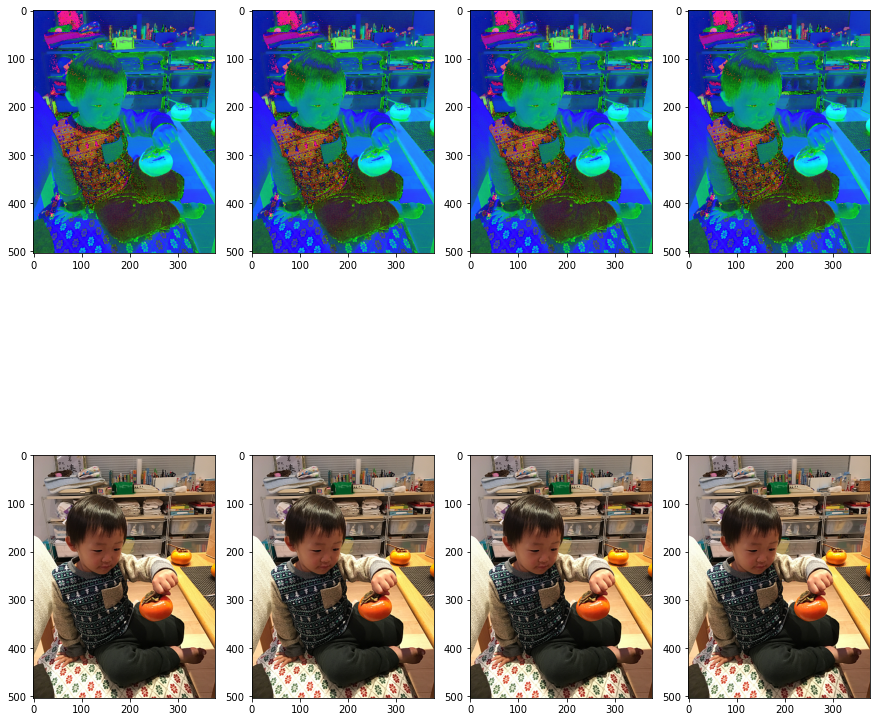

In [7]:
# Check with matplotlib library
from matplotlib.colors import hsv_to_rgb, rgb_to_hsv
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

in_img_path = "in/kid.png"
img = Image.open(in_img_path)
pix = np.float32(img)
pix /= 255
print(pix.shape)

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

start = time()
HSV = rgb_to_hsv(pix)
print(f"Time required for rgb_to_hsv:\n\t{round((time()-start), 4)}")
start = time()
RGB = hsv_to_rgb(HSV)
print(f"Time required for hsv_to_rgb:\n\t{round((time()-start), 4)}")

fig.add_subplot(2,4,1)
plt.imshow(HSV)
fig.add_subplot(2,4,5)
plt.imshow(RGB)

HSV1 = convertRGB2HSV(1, pix)
RGB1 = convertHSV2RGB(1, HSV1)
fig.add_subplot(2,4,3)
plt.imshow(HSV1)
fig.add_subplot(2,4,7)
plt.imshow(RGB1)

HSV2 = convertRGB2HSV(2, pix)
RGB2 = convertHSV2RGB(2, HSV2)
fig.add_subplot(2,4,4)
plt.imshow(HSV2)
fig.add_subplot(2,4,8)
plt.imshow(RGB2)


HSV3 = convertRGB2HSVbetter(pix)
RGB3 = convertHSV2RGBbetter(HSV3)
fig.add_subplot(2,4,2)
plt.imshow(HSV3)
fig.add_subplot(2,4,6)
plt.imshow(RGB3)


In [8]:
from PIL import Image
from time import time
import numpy as np
import matplotlib.pyplot as plt

in_img_path = 'in/kid.png'
img = Image.open(in_img_path)
pix = np.asarray(img)/255

# Convert the image to HSV
hsvpix = convertRGB2HSVbetter(pix)

# Increase saturation by 1.2 times
satadj = 1.2
hsvpix[:,:,1] = np.multiply(hsvpix[:,:,1], satadj, out=np.ones_like(hsvpix[:,:,1], dtype=np.float32), where=hsvpix[:,:,1]*satadj<=1.)

# Convert the image back to RGB
rgbpix = convertHSV2RGBbetter(hsvpix)

# Create the new image from array
newimg = Image.fromarray(np.uint8(rgbpix*255))

Time required for convertRGB2HSVbetter:
	0.1901
Time required for convertHSV2RGBbetter:
	0.3597


## Display Before-After Images Side-by-side

(378, 504)


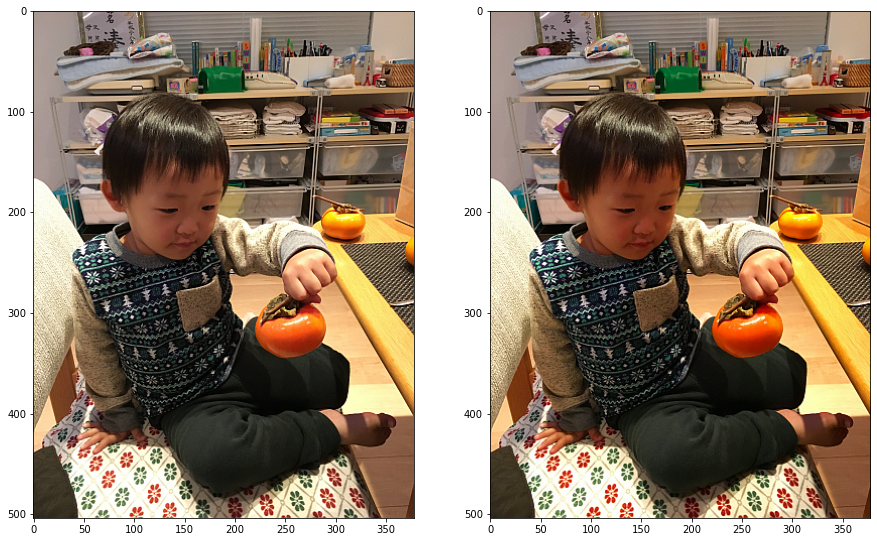

In [9]:
print(img.size)
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1,2,1)
plt.imshow(img)

fig.add_subplot(1,2,2)
plt.imshow(newimg)

Example code:

In [10]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

in_img_path = "in/kid.png"
img = Image.open(in_img_path)
pix = np.asarray(img)

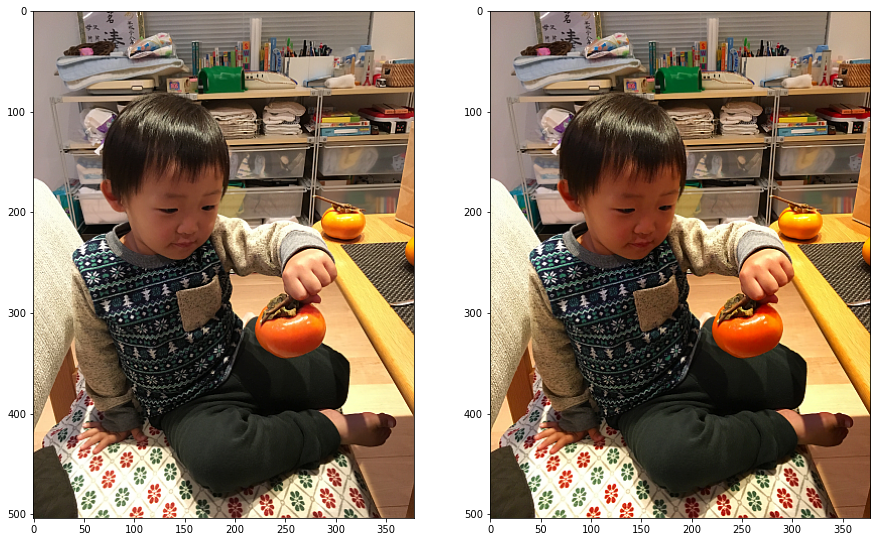

In [11]:
values = np.float32(pix)
values = values/255.0
hsv = np.copy(values)
result = np.copy(values)

max = np.amax(values,2)
min = np.amin(values,2)
delta = max - min

h = pix.shape[0]
w = pix.shape[1]

# Convert to HSV and scale the saturation by 1.2
for i in range(0,h):
    for j in range (0, w):
        if delta[i,j] < 1e-4:
            hue = 0
        else:
            # if max = red
            if abs(max[i,j] - values[i,j,0]) < 1e-5:
                hue = 60 * (((values[i,j,1] - values[i,j,2])/delta[i,j])%6) 
            else:
                # if max = green
                if abs(max[i,j] - values[i,j,1]) < 1e-5:
                    hue = 60*((values[i,j,2] - values[i,j,0])/delta[i,j] +2) 
                else:
                    # max = blue
                    hue = 60*((values[i,j,0] - values[i,j,1])/delta[i,j] +4)  
        if max[i,j] < 1e-5:
            saturation = 0
        else:
            saturation = delta[i,j]/max[i,j]               
        
        hsv[i,j,0] = hue
        hsv[i,j,2] = max[i,j]
        if max[i,j] > 0.1:
            hsv[i,j,1] = saturation*1.2 # multiply by a factor of 1.2 
        else:
            hsv[i,j,1] = saturation
        # you need to clip the values, othewise you will see unwanted noise
        if saturation * 1.2 > 1.0:
            hsv[i,j,1] = 1.0

# Convert back to RGB
for i in range(0,h):
    for j in range (0, w):
        hue = hsv[i,j,0]
        saturation = hsv[i,j,1]
        value = hsv[i,j,2]
        c = value * saturation
        x = c * (1- abs( (hue/60)%2 -1))
        m = value - c
        if 0 <= hue and hue < 60:
            result[i,j,0] = c
            result[i,j,1] = x
            result[i,j,2] = 0
        else:
            if 60 <= hue and hue < 120:
                result[i,j,0] = x
                result[i,j,1] = c
                result[i,j,2] = 0
            else:
                if 120 <= hue and hue < 180:
                    result[i,j,0] = 0
                    result[i,j,1] = c
                    result[i,j,2] = x
                else:
                    if 180 <= hue and hue <240:
                        result[i,j,0] = 0
                        result[i,j,1] = x
                        result[i,j,2] = c
                    else:
                        if 240 <= hue and hue <300:
                            result[i,j,0] = x
                            result[i,j,1] = 0
                            result[i,j,2] = c
                        else:
                            if 300 <= hue and hue <360:
                                result[i,j,0] = c
                                result[i,j,1] = 0
                                result[i,j,2] = x
        for k in range(0,3):
            result[i,j,k] = (result[i,j,k]+m)*255
            
# you probably need clipping
np.clip(result, 0, 255)

# save and also show results
results = Image.fromarray(np.uint8(result))
results.save("sat_mod.png") 

# set up side-by-side image display
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1,2,1)
plt.imshow(img)

# display the new image
fig.add_subplot(1,2,2)
plt.imshow(results)

plt.show(block=True)